In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from data_helper import *

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [4]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, Matern, RationalQuadratic

In [5]:
kernels = zip((ConstantKernel(), RBF(), WhiteKernel(), Matern(), 
               RationalQuadratic()), ("constant", "rbf", "white", "matern", "rational_quadratic"))


In [6]:
for kernel, name in kernels:
    check_on_dataset(GaussianProcessRegressor, f"gp-{name}", "gp_default_kernels", kernel = kernel, copy_X_train = False)

KeyboardInterrupt: 

IntProgress(value=0, max=77)

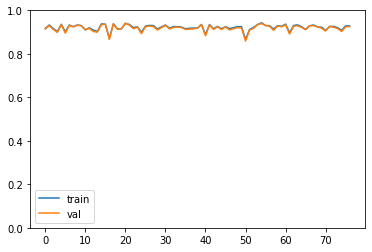

In [9]:
from ipywidgets import IntProgress
from IPython.display import display

X_train = dataset_in["train"]["full"]
y_train = dataset_in["train"]["y"]

n = len(X_train)
batch_size = 500

kernel = RationalQuadratic()
train_scores = []
val_scores = []
f = IntProgress(min=0, max=int(n/batch_size)+1)
display(f)
for i in range(int(n/batch_size)+1):
    test_gp = GaussianProcessRegressor(kernel = kernel, copy_X_train = False)
    test_gp.fit(X_train[i*batch_size: min((i+1)*batch_size, n-1)], y_train[i*batch_size: min((i+1)*batch_size, n-1)])
    train_scores.append(test_gp.score(dataset_in["train"]["full"], dataset_in["train"]["y"]))
    val_scores.append(test_gp.score(dataset_in["val"]["full"], dataset_in["val"]["y"]))
    kernel.set_params(**(test_gp.kernel_.get_params()))
    f.value += 1

plt.plot(range(len(train_scores)), train_scores, label = "train")
plt.plot(range(len(val_scores)), val_scores, label = "val")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [10]:
test_gp.kernel_.get_params()

{'length_scale': 20.403615707867534,
 'alpha': 0.24316166045022866,
 'length_scale_bounds': (1e-05, 100000.0),
 'alpha_bounds': (1e-05, 100000.0)}

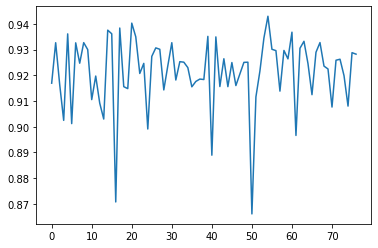

In [11]:
plt.plot(range(len(train_scores)), train_scores, label = "train")

In [12]:
list(zip(train_scores, val_scores))

[(0.9169203852836955, 0.9147057467170981),
 (0.9326536922970218, 0.9299499521114922),
 (0.9164588370051568, 0.9124983226933746),
 (0.9024718789637253, 0.8987785373172774),
 (0.9360917961504842, 0.9342935796902688),
 (0.9012073316933332, 0.8950199581214882),
 (0.9326100618190831, 0.9304401607998793),
 (0.9246937705284497, 0.9248559028981134),
 (0.9326898443523575, 0.9315847270273887),
 (0.9299864656185707, 0.9289691420124055),
 (0.9105396767122768, 0.9105842505562163),
 (0.9196971284675302, 0.9168524538302113),
 (0.9091685822384771, 0.902888095121829),
 (0.9029883316526602, 0.8998315459125535),
 (0.9375376889924183, 0.933852503078617),
 (0.9361317707431857, 0.9364048463810057),
 (0.8707494512807094, 0.8659537295439274),
 (0.938365399520928, 0.9376678021965967),
 (0.9155684163774223, 0.9128931325245753),
 (0.914811498793254, 0.9159158457024947),
 (0.9402742306369323, 0.9407105239109607),
 (0.9349596221390246, 0.9320161071362318),
 (0.9207032374480352, 0.9158243498471637),
 (0.92462496710

In [14]:
test_gp = GaussianProcessRegressor(kernel = RBF())
test_gp.fit(X_train, y_train)

MemoryError: Unable to allocate 10.9 GiB for an array with shape (38309, 38309) and data type float64

In [15]:
n/500

76.618